In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *

In [2]:
from aztec_gddt.helper_types import ExperimentParamSpec

exp_spec = ExperimentParamSpec(
    params_swept_control={
        'VALIDATOR_COMMITTEE_SIZE': [128, 512],
        'SIGNATURES_NEEDED': [0.0, 1.0]
    },
    params_swept_env={
        'MAX_VALIDATORS_TO_SLASH': [0.0, 1.0],
        'SIGNATURE_SKIP_PROBABILITY': [0.00, 1.0]

    },
    N_timesteps=1_000,
    N_samples=1,
    N_config_sample=-1,
    relevant_per_trajectory_metrics=PER_TRAJECTORY_METRICS_LABELS.keys(),
    relevant_per_trajectory_group_metrics=PER_TRAJECTORY_GROUP_METRICS_LABELS.keys(),
)

In [3]:
CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

sim_df, exec_time = execute_sim(exp_spec, return_sim_df=True, upload=False, parallelize=False)


2025-02-04 19:09:01 - aztec-gddt-v2 - INFO
{exp_spec.label} Run invoked at 2025-02-04 19:09:01.748828

2025-02-04 19:09:01 - aztec-gddt-v2 - INFO
 dimensions: N_jobs=7, N_t=1,000, N_sweeps=16, N_mc=1, N_trajectories=16, N_measurements=16,000

2025-02-04 19:09:01 - aztec-gddt-v2 - INFO
 starting at 2025-02-04 19:09:01.749510, (0:00:00.000682 since invoke)

2025-02-04 19:09:09 - aztec-gddt-v2 - INFO
 Run finished at 2025-02-04 19:09:09.394182, (0:00:07.644672 since sim start)

2025-02-04 19:09:09 - aztec-gddt-v2 - INFO
 Run Performance Numbers; Duration (s): 7.64, Measurements Per Second: 2,092.96 M/s, Measurements per Job * Second: 298.99 M/(J*s), Jobs * Seconds per Trajectory : 3.34


In [4]:
print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 16
    2. Total number of Monte Carlo runs per parameter combination: 1
    3. Total number of trajectories: 16
    4. Total number of timesteps per trajectory: 1,000
    5. Total number of state measurements: 16,000
    


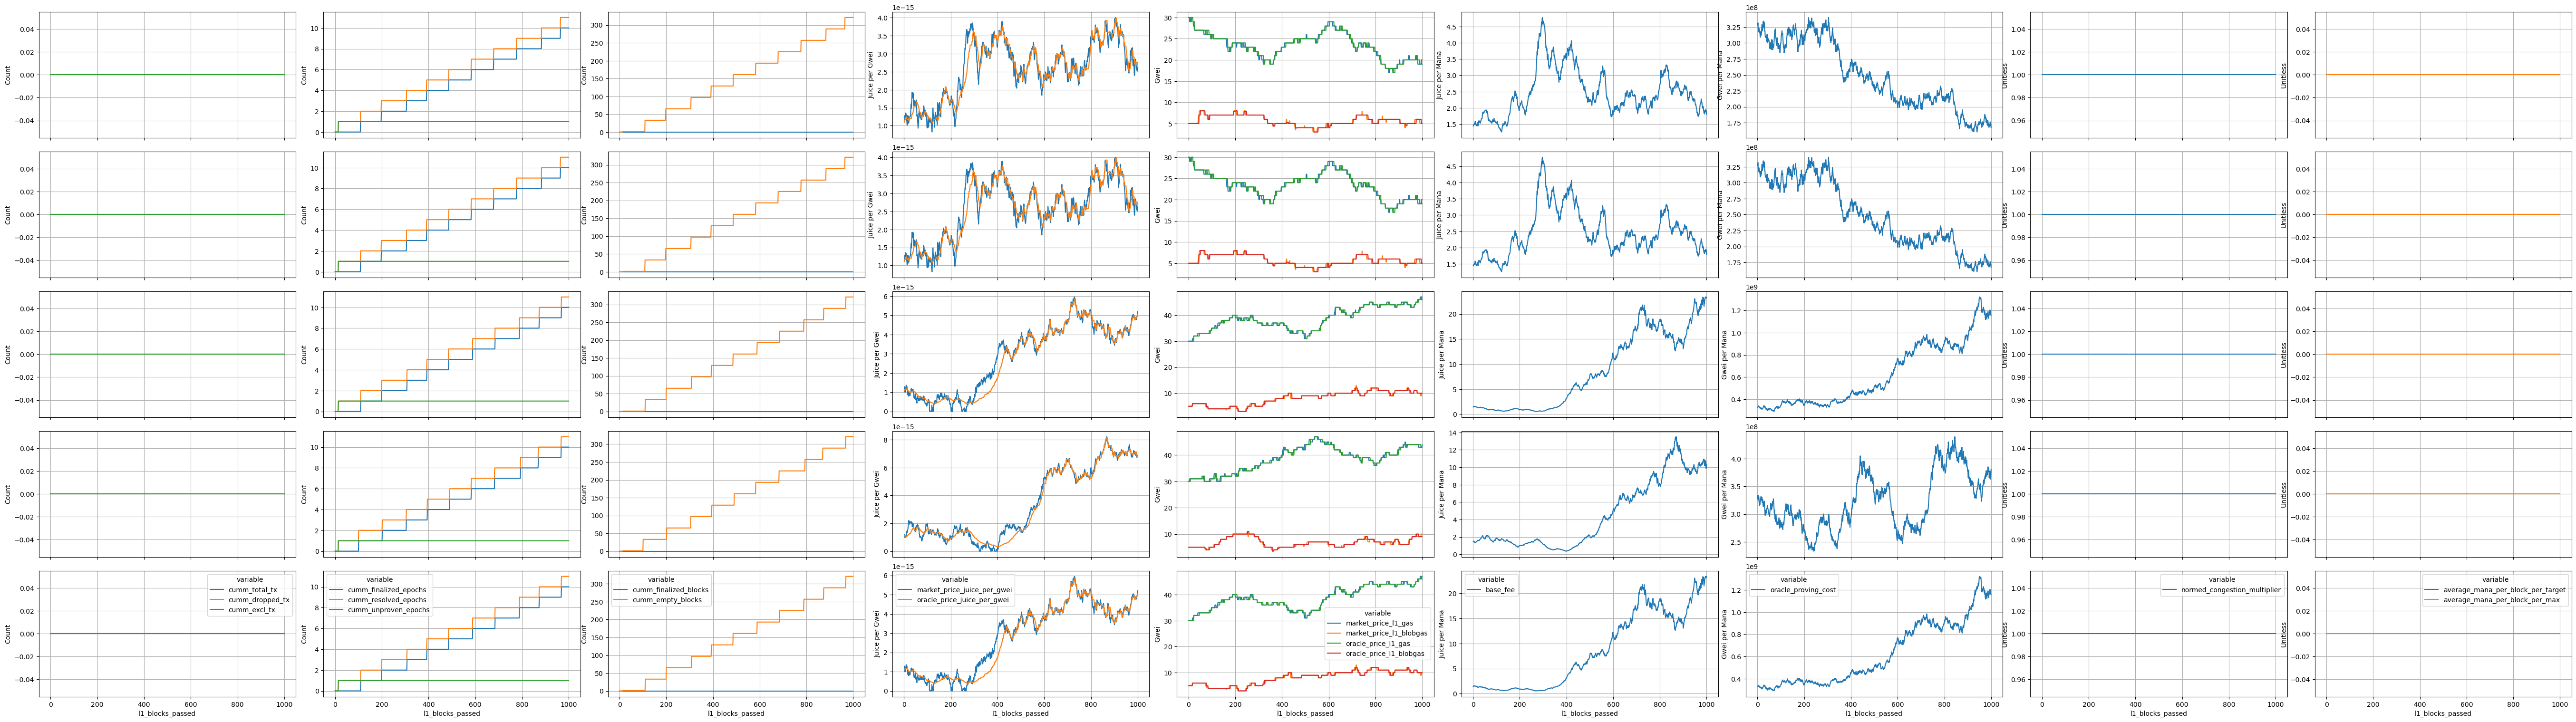

In [5]:
plot_inspect_vars(sim_df)

In [6]:
agg_df, c_agg_df = retrieve_feature_df(sim_df, CONTROL_PARAMS, exp_spec.relevant_per_trajectory_group_metrics)

In [7]:
agg_df

metric,simulation,subset,VALIDATOR_COMMITTEE_SIZE,SIGNATURES_NEEDED,TG-M1,TG-M10,TG-M12,TG-M13,TG-M2,TG-M3,TG-M4,TG-M5,TG-M6,TG-M7,TG-M8a,TG-M8b,TG-M9
0,0,0,128,0.0,8.575311e-16,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.524356,1.0,NaN,NaN,inf
1,0,1,128,0.0,1.265790e-15,1.0,1.0,1.0,5.0,1.0,0.0,1.0,0.499350,0.0,NaN,NaN,inf
2,0,2,128,0.0,9.238676e-16,0.0,0.0,0.0,321.0,1.0,NaN,0.0,NaN,1.0,NaN,NaN,4.627299e+13
3,0,3,128,0.0,1.313056e-15,0.0,0.0,0.0,321.0,2.0,NaN,0.0,NaN,1.0,NaN,NaN,inf
4,0,4,128,1.0,2.308239e-16,0.0,0.0,0.0,321.0,1.0,NaN,0.0,NaN,0.0,NaN,NaN,inf
5,0,5,128,1.0,1.834958e-15,0.0,0.0,0.0,321.0,1.0,NaN,0.0,NaN,1.0,NaN,NaN,inf
6,0,6,128,1.0,8.383655e-16,0.0,0.0,0.0,321.0,2.0,NaN,0.0,NaN,1.0,NaN,NaN,inf
7,0,7,128,1.0,7.320720e-16,0.0,0.0,0.0,321.0,1.0,NaN,0.0,NaN,0.0,NaN,NaN,inf
8,0,8,512,0.0,1.319596e-15,1.0,1.0,1.0,3.0,1.0,0.0,1.0,0.490173,1.0,NaN,NaN,-1.092349e+13
9,0,9,512,0.0,7.867404e-16,1.0,1.0,1.0,35.0,2.0,0.0,1.0,0.512127,1.0,NaN,NaN,inf
